# The Challenge

### An eccentric but wealthy investor has spent millions of dollars building a flying saucer prototype. He is offering a prize of 10 Bitcoin to the person who can come up with a mathematical model that best predicts the flying saucer's height (in meters) as a function of time during its initial launch. 

The data has been e-mailed to us as a .csv file called "height_data_basic.csv". It represents the height of the flying saucer(in meters) during the first 7 seconds of the saucer's launch. We have no other information. 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
height_df = pd.read_csv("height_data_basic.csv")

In [20]:
height_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  800 non-null    int64  
 1   time        800 non-null    float64
 2   height      800 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 18.9 KB


In [21]:
height_df.head()

,Unnamed: 0,time,height
0,0,0.009683,10.296167
1,1,0.018922,10.548359
2,2,0.027022,10.722826
3,3,0.032868,10.919808
4,4,0.055189,11.682872


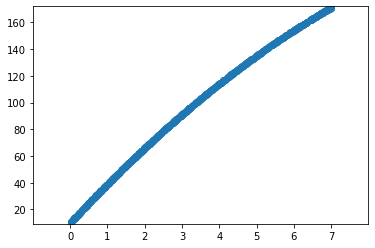

In [33]:
plt.scatter(height_df["time"], height_df["height"])
plt.xlim(height_df["time"].min() - 1, height_df["time"].max()+1) #change x-axis
plt.ylim(height_df["height"].min()- 1, height_df["height"].max()+1) #change y-axis
plt.show()

In [23]:
height_df["time"].corr(height_df["height"])

0.9968113239576211

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(height_df["time"], 
                                                    height_df["height"], 
                                                    test_size = 0.3,
                                                    random_state = 1)

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [28]:
lm.score(X_train.values.reshape(-1,1),y_train)

0.9935782851614944

In [29]:
lm.score(X_test.values.reshape(-1,1), y_test)

0.993682288699795

In [30]:
from sklearn.metrics import r2_score #get access to r^2

## Looks awesome so far! Very high accuracy on both the training data and test data. We are on our way to 10 BTC!!!

#### We should plot our line of best fit against our model. 

In [31]:
height_pred = lm.predict(height_df["time"].values.reshape(-1,1))

NameError: name 'y_pred' is not defined

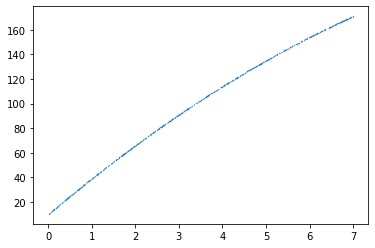

In [32]:
plt.scatter(height_df["time"], height_df["height"], 0.05, 
            label = "Actual Height")
plt.plot(height_df["time"],y_pred, color = "red", label = "Ordinary Regression Line")
plt.xlim(height_df["time"].min() - 1, height_df["time"].max()+1) #change x-axis
plt.ylim(height_df["height"].min()- 1, height_df["height"].max()+1) #change y-axis
plt.legend()
plt.show()

#### Let's plot the **residuals** -- the difference between the observed value and the predicted value.

#### If our linear model is accurate, 

In [ ]:
residuals = height_df["height"].values - height_pred 
#Residuals are difference between predicted and actual. 

In [ ]:
plt.scatter(height_df["time"], residuals)
plt.xlabel("Time (in seconds)")
plt.ylabel("Residuals of Linear Model")
plt.show()

### Uh-oh. Our residuals should show no clear pattern; this one clearly has a quadratic pattern. This tells us that we're missing some part of the data that would be explained by the quadratic.  

#### We can also look at a plot of actual values vs. residuals. (This also works in higher dimensions.) 

In [ ]:
plt.scatter(height_df["height"],residuals, 
            label = "residuals")
plt.axhline(y=0, color = 'red', label = "y = 0")
plt.legend()
plt.show()

-----

This is a <span style = "color: red"> bad </span> model, despite the fact that there is a high fit. The residuals show a clear pattern. <h1> <span style = "color:red"> You  never want the residuals to show a clear pattern. If they do, this means there is some aspect of the data that your model is failing to capture. </span> </h1>

-----

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

For what comes next, it will be helpful to put our data columns separately from the original data frame.  

In [ ]:
height_data = height_df["height"]
time_data = height_df["time"].values.reshape(-1,1) 
#Need to reshape since it is a one-dimensional thing. 

We *should* really do a test-train split again, but we'll skip it this time since we're going to illustrate plenty. 

We can introduce higher-order terms for height by using the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) preprocessor in sklearn. 

In [ ]:
poly = PolynomialFeatures(degree = 2,
                          include_bias = False)

Now we make a **pipeline**, which is a way of creating a multi-step data-fitting procedure as one object. 

In [ ]:
qm = LinearRegression()

In [ ]:
quad_reg = make_pipeline(poly, qm)

In [ ]:
quad_reg.fit(time_data, height_data)

In [ ]:
qm.coef_

In [ ]:
qm.intercept_

We see that the model predicted by the quadratic regression is
$$h(t) = -1.000t^2 + 30.004 + 9.992$$. 



In [ ]:
quad_reg.score(time_data, height_data) 
#Get the r^2 value for this data. 

### Plot the data and the model again.

In [ ]:
plt.scatter(time_data, height_data, 0.05,
            color = "Blue",
            label = "Actual Height")
plt.plot(time_data, quad_reg.predict(time_data), color = "Red",
        label = "Predicted Height")
plt.xlabel("Time (in seconds)")
plt.ylabel("Height (in meters)")
plt.legend()
plt.show()

In [ ]:
#todo: You make a residual plot of time vs. actual_height.
#Answer below: What do you notice? (Add as Markdown cell. )

In [ ]:
#todo: You make a residual plot o time vs. actual_height.
#Answer below: What do you notice? (Add as a Markdown cell. )